In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics

In [148]:
sns.set(color_codes=True)

In [149]:
data = pd.read_csv("./energydata_complete.csv")
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [74]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [67]:
data.isnull().sum().sort_values(ascending = True)

Appliances     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
Visibility     0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
T6             0
Tdewpoint      0
dtype: int64

In [ ]:
# Data visualization

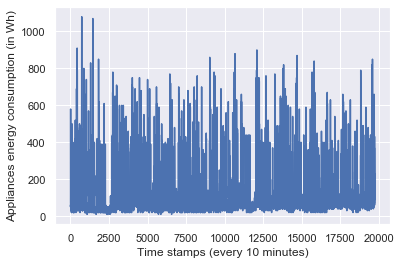

In [31]:
plt.plot(list(range(len(data['Appliances']))), data['Appliances'])
plt.xlabel('Time stamps (every 10 minutes)') 
plt.ylabel('Appliances energy consumption (in Wh)') 
plt.show()

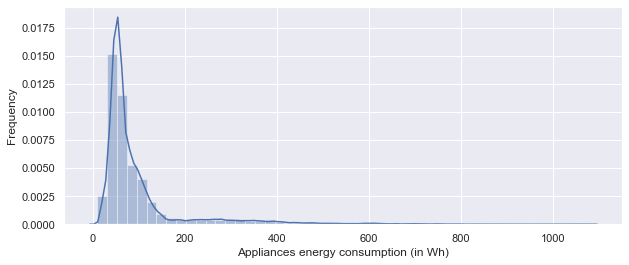

In [47]:
fig = plt.figure(figsize=(10, 4))
plt.xlabel("Appliances energy consumption (in Wh)")
plt.ylabel("Frequency")

sns.distplot(list(data['Appliances']), bins = 50)

# high energy consumption cases are very low

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20067780>,
      dtype=object)

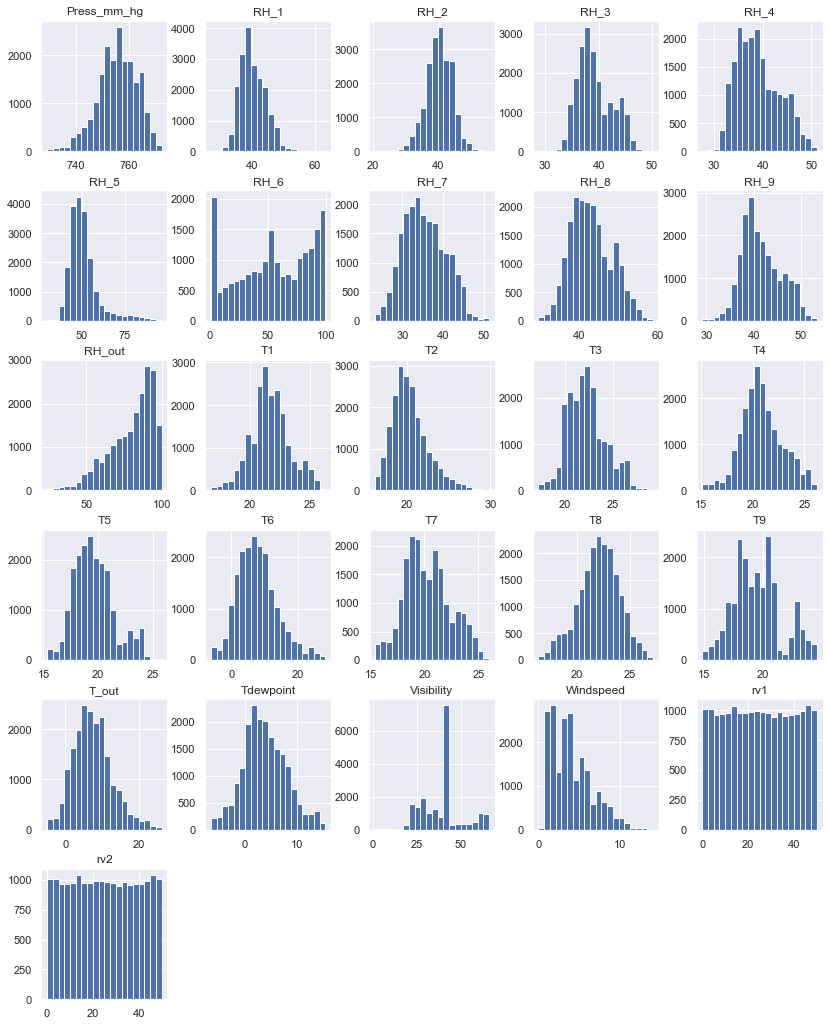

In [52]:
data.iloc[:,3:].hist(bins = 20, figsize = (14, 18))

# Most of the values follow normal distribution, but some of the values are not normally distributed

In [57]:
data.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [60]:
# All inside temperature values have positive correlation with the appliances (more heating is used - warmer - more electricity is spent)
data.loc[:, ['Appliances', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']].corr()

,Appliances,T1,T2,T3,T4,T5,T6,T7,T8,T9
Appliances,1.000000,0.055447,0.120073,0.085060,0.040281,0.019760,0.117638,0.025801,0.039572,0.010010
T1,0.055447,1.000000,0.836834,0.892402,0.877001,0.885247,0.654769,0.838705,0.825413,0.844777
T2,0.120073,0.836834,1.000000,0.735245,0.762066,0.720550,0.801186,0.663660,0.578191,0.675535
T3,0.085060,0.892402,0.735245,1.000000,0.852778,0.888169,0.686882,0.847374,0.795283,0.901324
T4,0.040281,0.877001,0.762066,0.852778,1.000000,0.871813,0.652350,0.877763,0.796256,0.889439
T5,0.019760,0.885247,0.720550,0.888169,0.871813,1.000000,0.629161,0.870624,0.824981,0.911055
T6,0.117638,0.654769,0.801186,0.686882,0.652350,0.629161,1.000000,0.619085,0.482836,0.667177
T7,0.025801,0.838705,0.663660,0.847374,0.877763,0.870624,0.619085,1.000000,0.882123,0.944776
T8,0.039572,0.825413,0.578191,0.795283,0.796256,0.824981,0.482836,0.882123,1.000000,0.869338
T9,0.010010,0.844777,0.675535,0.901324,0.889439,0.911055,0.667177,0.944776,0.869338,1.000000


In [ ]:
# Data transformation

In [75]:
# drop random columns, light column and date column - unnecessary columns
data.drop(['date', 'rv1', 'rv2', 'lights'], axis=1, inplace=True)

In [ ]:
# Models

In [ ]:
# We can use ARMA model because the data is stationary
# First use ARMA, then all other models

In [92]:
%matplotlib inline

from scipy import stats
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

In [102]:
dta = data['Appliances']

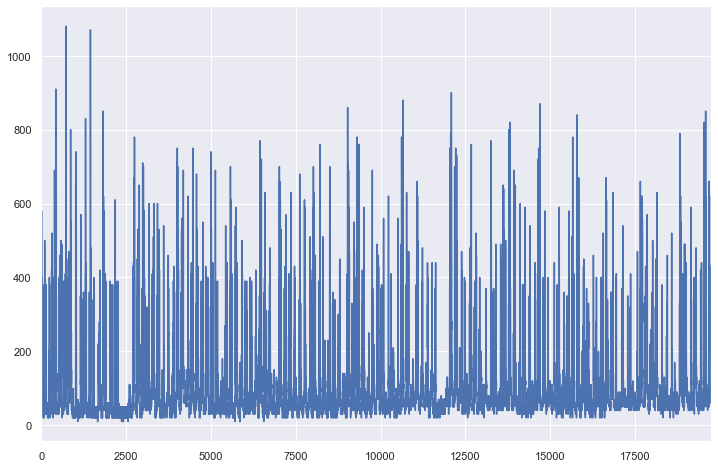

In [103]:
# Plot shows that data is stationary
dta.plot(figsize=(12,8))

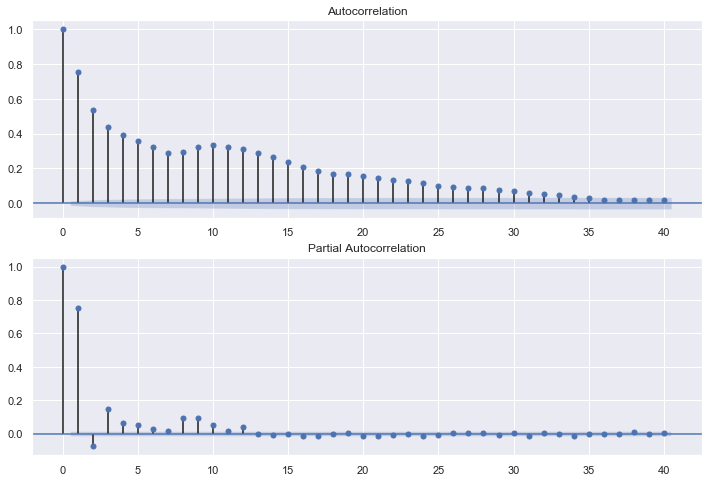

In [104]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)


# Significant autocorrelation values for timestamps 30 before (30 * 10 = 300 minutes)

In [105]:
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=False)
print(arma_mod20.params)

const               97.743087
ar.L1.Appliances     0.810617
ar.L2.Appliances    -0.076087
dtype: float64


In [117]:
arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit(disp=False)
print(arma_mod30.params)

const               97.748788
ar.L1.Appliances     0.821596
ar.L2.Appliances    -0.193162
ar.L3.Appliances     0.144497
dtype: float64


In [118]:
arma_mod80 = sm.tsa.ARMA(dta, (8,0)).fit(disp=False)

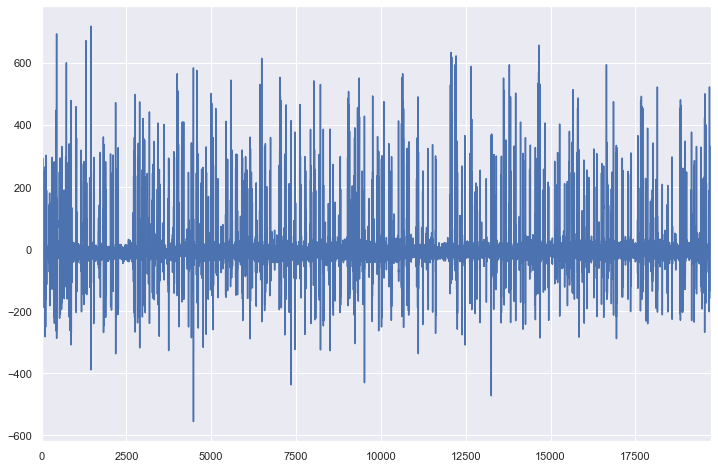

In [108]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

In [109]:
resid = arma_mod30.resid

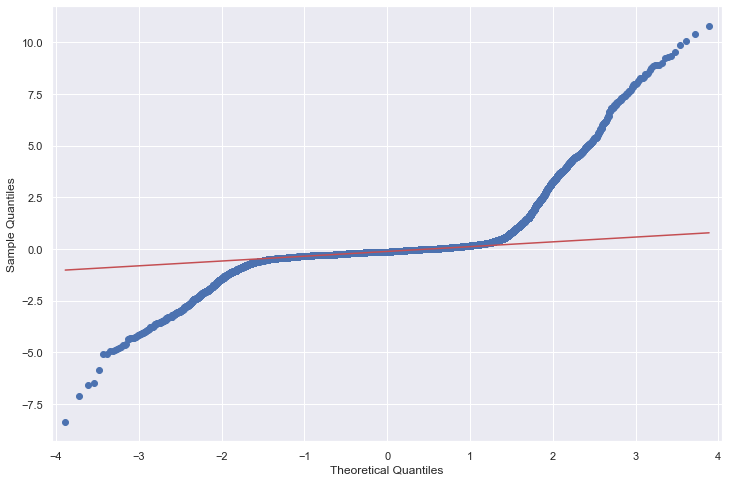

In [110]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

In [114]:
predict_appliances = arma_mod30.predict(15000, 19734, dynamic=True)
print(predict_appliances)

15000     99.002174
15001    100.113980
15002     99.775208
15003     99.137933
15004     98.840441
15005     98.670168
15006     98.495652
15007     98.342174
15008     98.225183
15009     98.133492
15010     98.058581
15011     97.997840
15012     97.949157
15013     97.910067
15014     97.878578
15015     97.853223
15016     97.832825
15017     97.816414
15018     97.803207
15019     97.792579
15020     97.784026
15021     97.777144
15022     97.771606
15023     97.767150
15024     97.763564
15025     97.760678
15026     97.758356
15027     97.756487
15028     97.754984
15029     97.753774
            ...    
19705     97.748788
19706     97.748788
19707     97.748788
19708     97.748788
19709     97.748788
19710     97.748788
19711     97.748788
19712     97.748788
19713     97.748788
19714     97.748788
19715     97.748788
19716     97.748788
19717     97.748788
19718     97.748788
19719     97.748788
19720     97.748788
19721     97.748788
19722     97.748788
19723     97.748788


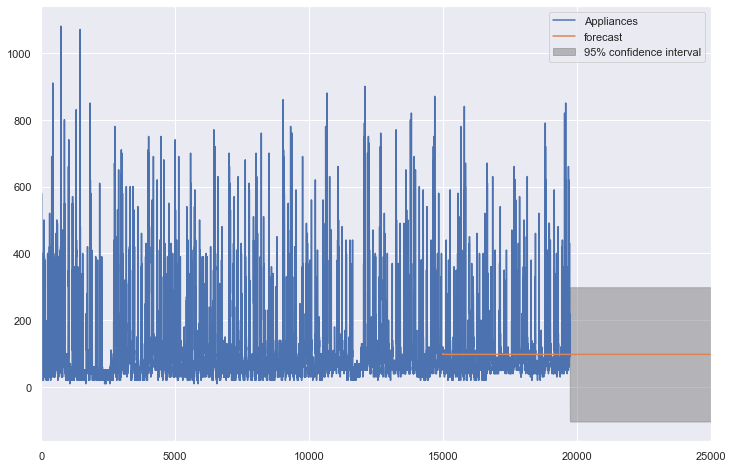

In [140]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.loc[0:].plot(ax=ax)
fig = arma_mod30.plot_predict(15000, 25000, dynamic=True, ax=ax, plot_insample=False)

# the data is very diverse, that's why ARMA doesn't work well

In [77]:
from sklearn import preprocessing, model_selection, metrics

In [78]:
# Data preprocessing

from sklearn.model_selection import train_test_split

# 75% of the data is used for the training of the models and the rest is used for testing
train, test = train_test_split(data, test_size=0.25,random_state=40)


col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 

col_target = ["Appliances"]

# Seperate dependent and independent variables 
feature_vars = train[col_temp + col_hum + col_weather]
target_vars = train[col_target]

# Split training dataset into independent and dependent varibales
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]

# Split testing dataset into independent and dependent varibales
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Create test and training set by including Appliances column

train = train[list(train_X.columns.values) + col_target]

test = test[list(test_X.columns.values) + col_target]

# Create dummy test and training set to hold scaled values (because we want to scale X and Y at the same time)

sc_train = pd.DataFrame(columns=train.columns , index=train.index)

sc_train[sc_train.columns] = sc.fit_transform(train)

sc_test = pd.DataFrame(columns=test.columns , index=test.index)

sc_test[sc_test.columns] = sc.fit_transform(test)

In [80]:
# Remove Appliances column from traininig set

train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

In [ ]:
# Model training

In [83]:
# Linear Regression
from sklearn.linear_model import Ridge

# Gradient Boosting
from sklearn.ensemble import ExtraTreesRegressor

# Neural Network
from sklearn.neural_network import MLPRegressor

from sklearn import neighbors
from sklearn.svm import SVR

In [84]:
# Regression models

models = [
           ['Ridge: ', Ridge()],
           ['Gradient Boosting :',ExtraTreesRegressor()],
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [85]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

/Users/neil/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [86]:
# Convert list to dataframe
df = pd.DataFrame(model_data)

In [87]:
df

,Name,Test_R2_Score,Test_RMSE_Score,Train_R2_Score,Train_Time
0,Ridge:,0.134456,0.930346,0.149661,0.082060
1,Gradient Boosting :,0.602827,0.630216,1.000000,0.809872
2,MLPRegressor:,0.230769,0.877058,0.285638,1.665254


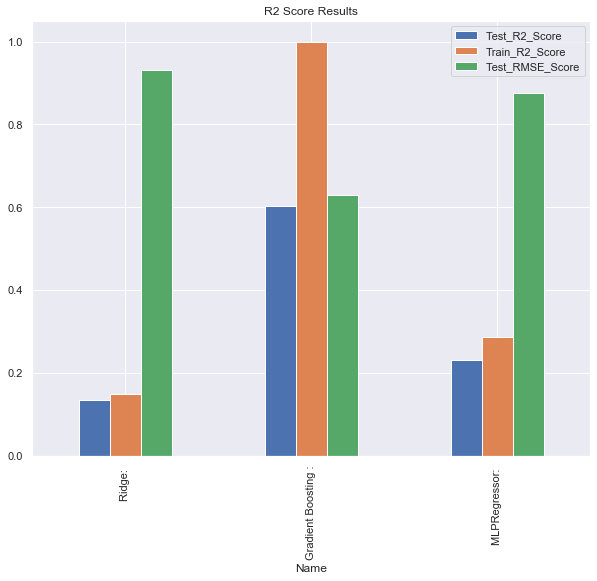

In [88]:
df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

In [89]:
# Gradient boosting (with feature selection)

from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [40, 90, 160, 200, 250],
              'n_estimators' : [100, 150, 200, 250],
              'max_features': ["auto", "sqrt", "log2"]
            }]

reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.2min


KeyboardInterrupt: 

In [ ]:
# Tuned parameter set
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(train_X,train_y)

In [ ]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(test_X,test_y)

In [ ]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

In [ ]:
# Feature importance

In [ ]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

In [ ]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(train_X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [ ]:
# Get top 5 most important feature 
names[0:5]

In [ ]:
# Get 5 least important feature 
names[-5:]